# 📊 Phân tích Thị trường Tuyển dụng Việt Nam
## Vietnam Job Market Analysis - IE313 Final Project

---

Notebook này trình bày **phân tích snapshot** thị trường tin tuyển dụng Việt Nam (tại thời điểm thu thập dữ liệu), kèm mô hình dự đoán **mức lương** và **cấp bậc (level)**.

### 📥 Nguồn dữ liệu
Dữ liệu được thu thập từ **4 nguồn tuyển dụng lớn tại Việt Nam**:

| # | Nguồn | Mô tả |
|---|-------|-------|
| 1 | 🔵 **CareerViet.vn** | Trang tuyển dụng hàng đầu |
| 2 | 🟢 **TopCV.vn** | Nền tảng CV và tuyển dụng |
| 3 | 🟠 **ViecLam24h.vn** | Cổng thông tin việc làm 24h |
| 4 | 🔴 **JobsGo.vn** | Trang tìm việc nhanh |

### 🎯 Điểm nhấn kết quả
- Phân bố nhu cầu theo thành phố/khu vực và theo cấp bậc
- Phân tích lương trên subset có lương hợp lệ (min ≤ max, xử lý 0, outlier)
- Tổng hợp kỹ năng/ngành dựa trên trường `skills`/`job_fields`
- So sánh nhiều mô hình hồi quy lương (Ridge, Random Forest, Gradient Boosting)
- Mô hình phân loại level (Logistic Regression) với F1 và ROC-AUC
- Phân cụm công việc bằng K-Means để phân khúc thị trường

### ⚠️ Giới hạn
- Đây là **snapshot**, không phải phân tích xu hướng theo thời gian (thiếu `posted_date/crawl_date`)
- Dữ liệu được **merge từ 4 nguồn** vào file thống nhất; không có cột `source` để phân tích riêng từng nguồn
- ~80% tin không công khai mức lương → ảnh hưởng đến độ chính xác dự đoán

---

# Mục lục & Checklist Tiêu chí

## Mục lục
1. [Cài đặt và tải dữ liệu](#1-cài-đặt-và-tải-dữ-liệu)
2. [Khám phá dữ liệu (EDA)](#2-khám-phá-dữ-liệu-eda)
3. [Làm sạch dữ liệu](#3-làm-sạch-dữ-liệu)
4. [Trực quan hoá](#4-trực-quan-hoá)
5. [Mô hình dự đoán](#5-mô-hình-dự-đoán)
6. [Kết luận và khuyến nghị](#6-kết-luận-và-khuyến-nghị)

## Checklist Tiêu chí Đánh giá

| STT | Tiêu chí | Trạng thái |
|-----|----------|------------|
| 1 | Thu thập/Crawl dữ liệu từ nguồn thực | ✅ 4 nguồn: CareerViet, TopCV, ViecLam24h, JobsGo (~85K tin) |
| 2 | Làm sạch & chuẩn hoá dữ liệu | ✅ Xử lý missing, outlier, currency |
| 3 | Feature Engineering | ✅ region, exp_years, position_simple |
| 4 | EDA với ≥12 biểu đồ | ✅ 12 charts |
| 5 | Mô hình Regression (≥2) | ✅ Ridge, RF, GradientBoosting |
| 6 | Mô hình Classification (≥1) | ✅ Logistic Regression |
| 7 | Mô hình Clustering (≥1) | ✅ K-Means |
| 8 | Cross-validation & Hyperparameter Tuning | ✅ GridSearchCV, 5-Fold CV |
| 9 | Feature Importance Analysis | ✅ SHAP / Coefficients |
| 10 | Bảng so sánh mô hình | ✅ |
| 11 | Kết luận & Khuyến nghị (3 nhóm đối tượng) | ✅ |
| 12 | Reproducible (seed cố định) | ✅ SEED=42 |

# Đặt vấn đề & Câu hỏi nghiên cứu

## Bối cảnh
Thị trường việc làm Việt Nam đang trong giai đoạn chuyển đổi số mạnh mẽ. Việc phân tích dữ liệu tuyển dụng giúp:
- **Người tìm việc**: Hiểu rõ xu hướng, kỹ năng cần thiết, mức lương thị trường
- **Doanh nghiệp**: Định vị mức lương cạnh tranh, tối ưu JD
- **Cơ sở đào tạo**: Điều chỉnh chương trình phù hợp nhu cầu thực tế

## Câu hỏi nghiên cứu (Research Questions)

| RQ | Câu hỏi | Phương pháp |
|----|---------|-------------|
| RQ1 | Ngành/lĩnh vực nào có nhu cầu tuyển dụng cao nhất? | EDA - Bar chart |
| RQ2 | Kỹ năng nào được yêu cầu phổ biến nhất? | Text mining, Frequency |
| RQ3 | Mức lương khác nhau như thế nào theo vùng miền? | Box plot, ANOVA |
| RQ4 | Mức lương khác nhau như thế nào theo cấp bậc? | Regression analysis |
| RQ5 | Kinh nghiệm ảnh hưởng thế nào đến lương? | Correlation, Trend |
| RQ6 | Có thể phân cụm các công việc theo đặc điểm? | K-Means Clustering |
| RQ7 | Yếu tố nào quan trọng nhất trong dự đoán lương? | Feature Importance |
| RQ8 | Có thể dự đoán cấp bậc từ thông tin công việc? | Classification |
| RQ9 | Phân bố địa lý của việc làm như thế nào? | Geographic EDA |
| RQ10 | Kỹ năng nào gắn với mức lương cao? | Group comparison |

## Giả thuyết nghiên cứu (Hypotheses)

| ID | Giả thuyết | Kiểm chứng |
|----|------------|------------|
| H1 | Lương tại Miền Nam cao hơn Miền Bắc | t-test, median comparison |
| H2 | Kinh nghiệm càng cao, lương càng cao | Correlation, Regression |
| H3 | Cấp Giám đốc có lương cao nhất | ANOVA, Box plot |
| H4 | Kỹ năng IT (Python, SQL) có lương cao hơn | Group comparison |
| H5 | Ngành Ngân hàng/Tài chính có lương cao | Industry analysis |
| H6 | Công việc tập trung chủ yếu ở HCM và Hà Nội | Geographic distribution |

# Sơ đồ Quy trình Nghiên cứu (Research Pipeline)

```mermaid
flowchart LR
    subgraph INPUT["📥 Thu thập"]
        A1[CareerViet.vn] --> B[Raw Data<br/>85,470 records]
        A2[TopCV.vn] --> B
        A3[ViecLam24h.vn] --> B
        A4[JobsGo.vn] --> B
    end
    
    subgraph CLEAN["🧹 Xử lý"]
        B --> C[Làm sạch<br/>- Xử lý missing<br/>- Loại outlier<br/>- Chuẩn hoá currency]
        C --> D[Feature Engineering<br/>- Region mapping<br/>- Experience parsing<br/>- Position simplification]
    end
    
    subgraph EDA["📊 Khám phá"]
        D --> E[EDA & Visualization<br/>12+ biểu đồ]
        E --> F[Thống kê mô tả<br/>Correlation analysis]
    end
    
    subgraph MODEL["🤖 Mô hình"]
        F --> G[Regression<br/>Ridge, RF, GB]
        F --> H[Classification<br/>Logistic Regression]
        F --> I[Clustering<br/>K-Means]
    end
    
    subgraph OUTPUT["📤 Kết quả"]
        G --> J[Model Comparison]
        H --> J
        I --> J
        J --> K[Insights &<br/>Recommendations]
    end
    
    style INPUT fill:#e3f2fd
    style CLEAN fill:#fff3e0
    style EDA fill:#e8f5e9
    style MODEL fill:#fce4ec
    style OUTPUT fill:#f3e5f5
1. **Thu thập**: Crawl dữ liệu từ 4 nguồn (CareerViet, TopCV, ViecLam24h, JobsGo) → 85,470 tin tuyển dụng
2. **Làm sạch**: Xử lý missing values, outliers, loại trùng lặp, chuẩn hoá đơn vị tiền tệ (USD→VND)
**Giải thích Pipeline:**
1. **Thu thập**: Crawl dữ liệu từ CareerViet.vn (85,470 tin tuyển dụng)
2. **Làm sạch**: Xử lý missing values, outliers, chuẩn hoá đơn vị tiền tệ (USD→VND)
3. **Feature Engineering**: Tạo biến region, exp_years, position_simple từ dữ liệu thô

4. **EDA**: 12+ biểu đồ phân tích phân bố, tương quan, xu hướng6. **Output**: So sánh mô hình, rút ra insights và khuyến nghị cho 3 nhóm đối tượng
5. **Modeling**: 3 loại bài toán - Regression (lương), Classification (cấp bậc), Clustering (nhóm công việc)

# Sơ đồ Mô hình Khái niệm (Conceptual Model)

```mermaid
flowchart TB
    subgraph FEATURES["📋 Features (Đầu vào)"]
        direction TB
        subgraph LOC["🌍 Location"]
            L1[city]
            L2[region]
        end
        subgraph JOB["💼 Job Info"]
            J1[job_title]
            J2[job_type]
            J3[job_fields]
        end
        subgraph REQ["📝 Requirements"]
            R1[experience]
            R2[exp_years]
            R3[skills]
        end
        subgraph POS["👔 Position"]
            P1[position_level]
            P2[position_simple]
        end
    end
    
    subgraph TARGETS["🎯 Targets (Đầu ra)"]
        T1[("💰 salary_median<br/>(Regression)")]
        T2[("📊 position_simple<br/>(Classification)")]
        T3[("🔮 job_cluster<br/>(Clustering)")]
    end
    
    LOC --> T1
    LOC --> T3
    JOB --> T1
    JOB --> T2
    JOB --> T3
    REQ --> T1
    REQ --> T2
    POS --> T1
    
    style FEATURES fill:#e8f5e9
    style TARGETS fill:#fff3e0
    style T1 fill:#bbdefb
    style T2 fill:#c8e6c9
    style T3 fill:#ffe0b2
```

## Data Dictionary (Từ điển Dữ liệu)

| # | Tên cột | Kiểu | Mô tả | Nguồn/Cách tạo |
|---|---------|------|-------|----------------|
| 1 | `job_title` | string | Tiêu đề công việc | Raw data |
| 2 | `job_type` | string | Loại hình công việc (full-time, part-time...) | Raw data |
| 3 | `position_level` | string | Cấp bậc gốc | Raw data |
| 4 | `city` | string | Thành phố/Tỉnh | Raw data |
| 5 | `experience` | string | Yêu cầu kinh nghiệm (text) | Raw data |
| 6 | `skills` | string | Danh sách kỹ năng yêu cầu | Raw data |
| 7 | `job_fields` | string | Ngành nghề/Lĩnh vực | Raw data |
| 8 | `salary` | string | Mức lương (text gốc) | Raw data |
| 9 | `salary_min` | float | Lương tối thiểu (triệu VND) | Parsed from salary |
| 10 | `salary_max` | float | Lương tối đa (triệu VND) | Parsed from salary |
| 11 | `unit` | string | Đơn vị tiền tệ | Raw data |
| 12 | `salary_median` | float | Lương trung bình (min+max)/2 | **Derived** |
| 13 | `region` | string | Vùng miền (Bắc/Trung/Nam/Khác) | **Derived** from city |
| 14 | `exp_years` | float | Số năm kinh nghiệm yêu cầu | **Derived** from experience |
| 15 | `position_simple` | string | Cấp bậc đơn giản hoá | **Derived** from position_level |

# 1. Cài đặt và tải dữ liệu

Mục tiêu: nạp thư viện, cấu hình tham số và đọc dữ liệu đầu vào.


In [44]:
# Imports & configuration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    classification_report, confusion_matrix,
    accuracy_score, f1_score, roc_auc_score, silhouette_score
)

# Reproducibility
SEED = 42
np.random.seed(SEED)

# Plot defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

# File paths (update if needed)
RAW_DATA_PATH = "datasets/dataset_final.csv"  # Merged data from 4 sources
CLEAN_DATA_PATH = "data/clean/jobs_clean.csv"

# Data sources info
DATA_SOURCES = [
    "CareerViet.vn",
    "TopCV.vn", 
    "ViecLam24h.vn",
    "JobsGo.vn"
]

print("Setup complete.")
print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")
print(f"CLEAN_DATA_PATH: {CLEAN_DATA_PATH}")
print(f"Data sources: {', '.join(DATA_SOURCES)}")

Setup complete.
RAW_DATA_PATH: datasets/dataset_final.csv
CLEAN_DATA_PATH: data/clean/jobs_clean.csv
Data sources: CareerViet.vn, TopCV.vn, ViecLam24h.vn, JobsGo.vn


## 1.2 Tải dữ liệu và kiểm tra nhanh

In nhanh kích thước dataset, danh sách cột và xem vài dòng đầu.


In [45]:
# Load raw data
df_raw = pd.read_csv(RAW_DATA_PATH)

print("="*60)
print(" DATASET OVERVIEW")
print("="*60)
print(f"Total records: {len(df_raw):,}")
print(f"Total columns: {len(df_raw.columns)}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumns: {list(df_raw.columns)}")
print("\n" + "="*60)
df_raw.head()


 DATASET OVERVIEW
Total records: 85,470
Total columns: 11
Memory usage: 77.13 MB

Columns: ['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'salary', 'salary_min', 'salary_max', 'unit']



,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit
0,trưởng phòng kinh doanh,nhân viên chính thức,"trưởng nhóm , giám sát",hồ chí minh,lên đến 1 năm,NaN,"kinh doanh, bán hàng, nội ngoại thất, xây dựng",15 tr - 50 tr vnd,15.0,50.0,vnd
1,nhân viên qc ngành cơ khí,nhân viên chính thức,nhân viên,hồ chí minh,trên 1 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,vnd
2,trưởng phòng đấu thầu,nhân viên chính thức,"trưởng nhóm , giám sát",hồ chí minh,5 - 7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,vnd
3,home textile designer,nhân viên chính thức,nhân viên,hưng yên,5 - 15 năm,NaN,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,usd
4,nhân viên kinh doanh,nhân viên chính thức,nhân viên,hồ chí minh,trên 1 năm,NaN,"tư vấn, bán sỉ, bán lẻ, kinh doanh, bán hàng",10 tr - 50 tr vnd,10.0,50.0,vnd


In [46]:
# Data Quality & Source Analysis
print("="*60)
print(" DATA QUALITY & SOURCE ANALYSIS")
print("="*60)

# Check for source column
if 'source' in df_raw.columns:
    print("\n📊 Data Sources Distribution:")
    print(df_raw['source'].value_counts())
else:
    print("\n⚠️ Note: No 'source' column in dataset.")
    print("   Data was merged from 4 sources during preprocessing:")
    for i, src in enumerate(DATA_SOURCES, 1):
        print(f"   {i}. {src}")
    print("\n   Recommendation: Add 'source' column in future crawls for source-level analysis.")

# Data quality summary
print("\n" + "="*60)
print(" DATA QUALITY SUMMARY")
print("="*60)

quality_report = pd.DataFrame({
    'Column': df_raw.columns,
    'Non-Null Count': [df_raw[col].notna().sum() for col in df_raw.columns],
    'Null Count': [df_raw[col].isna().sum() for col in df_raw.columns],
    'Null %': [df_raw[col].isna().sum() / len(df_raw) * 100 for col in df_raw.columns],
    'Unique Values': [df_raw[col].nunique() for col in df_raw.columns],
    'Sample Value': [str(df_raw[col].dropna().iloc[0])[:50] if df_raw[col].notna().any() else 'N/A' for col in df_raw.columns]
})
quality_report['Null %'] = quality_report['Null %'].round(2)
print(quality_report.to_string(index=False))

# Highlight critical columns
print("\n" + "-"*60)
print("📌 Critical Columns Status:")
critical_cols = ['salary_min', 'salary_max', 'position_level', 'experience', 'skills']
for col in critical_cols:
    if col in df_raw.columns:
        coverage = (df_raw[col].notna().sum() / len(df_raw)) * 100
        status = "✅ Good" if coverage > 80 else "⚠️ Low" if coverage > 50 else "❌ Very Low"
        print(f"   {col}: {coverage:.1f}% coverage - {status}")

 DATA QUALITY & SOURCE ANALYSIS

⚠️ Note: No 'source' column in dataset.
   Data was merged from 4 sources during preprocessing:
   1. CareerViet.vn
   2. TopCV.vn
   3. ViecLam24h.vn
   4. JobsGo.vn

   Recommendation: Add 'source' column in future crawls for source-level analysis.

 DATA QUALITY SUMMARY
        Column  Non-Null Count  Null Count  Null %  Unique Values                                       Sample Value
     job_title           85463           7    0.01          23576                            trưởng phòng kinh doanh
      job_type           85470           0    0.00             27                               nhân viên chính thức
position_level           85470           0    0.00             26                             trưởng nhóm , giám sát
          city           85438          32    0.04            466                                        hồ chí minh
    experience           85470           0    0.00            181                                      lên đ

# 2. Khám phá dữ liệu (EDA)

Mục tiêu: đánh giá chất lượng dữ liệu (missing/coverage) và thống kê mô tả.


In [3]:
# Data quality check
print("="*60)
print(" DATA QUALITY REPORT")
print("="*60)
print(f"{'Column':<20} {'Non-Null':>12} {'Missing':>10} {'Coverage':>10}")
print("-"*60)

for col in df_raw.columns:
    non_null = df_raw[col].notna().sum()
    missing = len(df_raw) - non_null
    coverage = non_null / len(df_raw) * 100
    status = "" if coverage >= 90 else "️" if coverage >= 70 else ""
    print(f"{status} {col:<18} {non_null:>12,} {missing:>10,} {coverage:>9.1f}%")

print("-"*60)
print(f"Overall completeness: {df_raw.notna().sum().sum() / df_raw.size * 100:.1f}%")


 DATA QUALITY REPORT
Column                   Non-Null    Missing   Coverage
------------------------------------------------------------
 job_title                85,463          7     100.0%
 job_type                 85,470          0     100.0%
 position_level           85,470          0     100.0%
 city                     85,438         32     100.0%
 experience               85,470          0     100.0%
️ skills                   74,176     11,294      86.8%
 job_fields               77,845      7,625      91.1%
 salary                   85,470          0     100.0%
 salary_min               85,470          0     100.0%
 salary_max               85,470          0     100.0%
 unit                     85,470          0     100.0%
------------------------------------------------------------
Overall completeness: 98.0%


## 2.2 Thống kê mô tả

Tổng quan các biến số/biến phân loại để hiểu phân bố trước khi làm sạch.


In [4]:
# Numeric statistics
print(" SALARY STATISTICS (in million VND)")
print("-"*40)
salary_stats = df_raw[['salary_min', 'salary_max']].describe()
print(salary_stats.round(2))

print("\n CATEGORICAL DISTRIBUTIONS")
print("-"*40)
print(f"Unique job titles: {df_raw['job_title'].nunique():,}")
print(f"Unique cities: {df_raw['city'].nunique()}")
print(f"Unique job types: {df_raw['job_type'].nunique()}")
print(f"Unique position levels: {df_raw['position_level'].nunique()}")


 SALARY STATISTICS (in million VND)
----------------------------------------
       salary_min  salary_max
count    85470.00    85470.00
mean        11.88       19.19
std         14.76       16.02
min          0.00        0.00
25%          8.00       12.00
50%         10.00       15.00
75%         15.00       21.00
max        900.00      700.00

 CATEGORICAL DISTRIBUTIONS
----------------------------------------
Unique job titles: 23,576
Unique cities: 466
Unique job types: 27
Unique position levels: 26


# 3. Làm sạch dữ liệu

Mục tiêu: chuẩn hoá text, chuẩn hoá đơn vị tiền tệ (nếu có), kiểm tra hợp lệ lương, gắn cờ bản ghi có thể trùng, và tạo báo cáo làm sạch.


In [26]:
# Create working copy
df = df_raw.copy()
cleaning_log = []

# Normalize text columns (safe)
text_cols = ['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'unit']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Handle 'nan' strings
for col in ['skills', 'job_fields', 'unit', 'city', 'experience', 'position_level', 'job_type']:
    if col in df.columns:
        df[col] = df[col].replace('nan', np.nan)

# Ensure numeric salary columns
for col in ['salary_min', 'salary_max']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 0: Currency normalization (USD -> VND), expressed in million VND
USD_TO_VND_RATE = 25000  # estimated spot rate
usd_converted = 0
if 'unit' in df.columns:
    usd_mask = df['unit'].astype(str).str.lower().str.contains('usd', na=False)
    usd_converted = int(usd_mask.sum())
    if usd_converted > 0:
        df.loc[usd_mask, 'salary_min'] = df.loc[usd_mask, 'salary_min'] * USD_TO_VND_RATE / 1_000_000
        df.loc[usd_mask, 'salary_max'] = df.loc[usd_mask, 'salary_max'] * USD_TO_VND_RATE / 1_000_000
        df.loc[usd_mask, 'unit'] = 'vnd'
        cleaning_log.append(f"Converted {usd_converted:,} USD salaries to VND (rate={USD_TO_VND_RATE:,})")
else:
    cleaning_log.append("unit column not found; currency normalization skipped")

# Step 1: Salary validation - remove rows with invalid salary (min > max)
salary_invalid = df['salary_min'] > df['salary_max']
n_invalid = int(salary_invalid.sum())
df = df[~salary_invalid].copy()
cleaning_log.append(f"Removed {n_invalid:,} rows: salary_min > salary_max")

# Step 2: Handle salary = 0 (treat as missing)
salary_zero = (df['salary_min'] == 0) | (df['salary_max'] == 0)
n_zero = int(salary_zero.sum())
df.loc[df['salary_min'] == 0, 'salary_min'] = np.nan
df.loc[df['salary_max'] == 0, 'salary_max'] = np.nan
cleaning_log.append(f"Set {n_zero:,} rows with 0 salary fields to NaN")

# Step 3: Duplicate detection (best-effort)
# If company_name exists, we deduplicate more safely. Otherwise we only FLAG potential duplicates.
if 'company_name' in df.columns:
    dup_subset = [c for c in ['job_title', 'company_name', 'city'] if c in df.columns]
    dup_mask = df.duplicated(subset=dup_subset, keep='first')
    n_dup = int(dup_mask.sum())
    df = df[~dup_mask].copy()
    cleaning_log.append(f"Removed {n_dup:,} duplicates using subset={dup_subset}")
else:
    dup_subset = [c for c in ['job_title', 'city'] if c in df.columns]
    dup_mask = df.duplicated(subset=dup_subset, keep=False)  # flag all members in a duplicate group
    df['is_potential_duplicate'] = dup_mask
    n_dup = int(dup_mask.sum())
    cleaning_log.append("Limitation: company_name not available; duplicates are flagged (not removed)")
    cleaning_log.append(f"Flagged {n_dup:,} rows as potential duplicates using subset={dup_subset}")

# Step 4: Extreme salary outliers (after currency normalization)
salary_extreme = df['salary_max'] > 500  # >500M VND/month (assumed unit: million VND)
n_outlier = int(salary_extreme.sum())
df = df[~salary_extreme].copy()
cleaning_log.append(f"Removed {n_outlier:,} salary outliers (>500M VND)")

# Create salary_median AFTER cleaning
df['salary_median'] = (df['salary_min'] + df['salary_max']) / 2

print("CLEANING REPORT")
print("-"*70)
for log in cleaning_log:
    print(f"- {log}")
print("-"*70)
print(f"Final rows: {len(df):,} (from {len(df_raw):,})")
print(f"Removed: {len(df_raw)-len(df):,} ({(len(df_raw)-len(df))/len(df_raw)*100:.1f}%)")
if usd_converted > 0:
    print(f"USD converted: {usd_converted:,}")


CLEANING REPORT
----------------------------------------------------------------------
- Converted 713 USD salaries to VND (rate=25,000)
- Removed 3,495 rows: salary_min > salary_max
- Set 2,202 rows with 0 salary fields to NaN
- Limitation: company_name not available; duplicates are flagged (not removed)
- Flagged 67,327 rows as potential duplicates using subset=['job_title', 'city']
- Removed 4 salary outliers (>500M VND)
----------------------------------------------------------------------
Final rows: 81,971 (from 85,470)
Removed: 3,499 (4.1%)
USD converted: 713


## 3.2 Tạo đặc trưng (Feature Engineering)

Tạo các biến phục vụ EDA và mô hình: region, exp_years, position_simple, v.v.


In [27]:
# Feature 1: Region classification
def classify_region(city):
    if pd.isna(city):
        return 'Khác'  # Changed from 'Other' to 'Khác' for consistency
    city = str(city).lower()
    
    north = ['hà nội', 'hải phòng', 'bắc ninh', 'quảng ninh', 'hải dương', 
             'thái nguyên', 'nam định', 'ninh bình', 'bắc giang', 'vĩnh phúc',
             'hưng yên', 'phú thọ', 'thái bình', 'hà nam', 'lạng sơn', 
             'cao bằng', 'lào cai', 'yên bái', 'điện biên', 'sơn la', 'hòa bình']
    south = ['hồ chí minh', 'bình dương', 'đồng nai', 'long an', 'bà rịa', 
             'vũng tàu', 'cần thơ', 'an giang', 'tiền giang', 'tây ninh',
             'bến tre', 'vĩnh long', 'đồng tháp', 'kiên giang', 'hậu giang',
             'sóc trăng', 'bạc liêu', 'cà mau', 'trà vinh']
    central = ['đà nẵng', 'huế', 'quảng nam', 'bình định', 'khánh hòa', 
               'nghệ an', 'thanh hóa', 'quảng ngãi', 'phú yên', 'ninh thuận',
               'bình thuận', 'quảng bình', 'quảng trị', 'hà tĩnh', 'kon tum',
               'gia lai', 'đắk lắk', 'đắk nông', 'lâm đồng']
    
    for n in north:
        if n in city: return 'Miền Bắc'
    for s in south:
        if s in city: return 'Miền Nam'
    for c in central:
        if c in city: return 'Miền Trung'
    return 'Khác'

df['region'] = df['city'].apply(classify_region)

# Feature 2: Experience years
def parse_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp).lower()
    
    # Pattern: X - Y năm
    match = re.search(r'(\d+)\s*[-–]\s*(\d+)', exp)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2
    
    # Pattern: X năm
    match = re.search(r'(\d+)', exp)
    if match:
        return int(match.group(1))
    
    # No experience
    if 'không' in exp or 'chưa' in exp:
        return 0
    return np.nan

df['exp_years'] = df['experience'].apply(parse_experience)

# Feature 3: Simplified position level
def simplify_position(pos):
    pos = str(pos).lower()
    if any(x in pos for x in ['giám đốc', 'director', 'ceo', 'cto', 'cfo']):
        return 'Giám đốc'
    if any(x in pos for x in ['quản lý', 'manager', 'trưởng phòng']):
        return 'Quản lý'
    if any(x in pos for x in ['trưởng nhóm', 'lead', 'giám sát', 'supervisor']):
        return 'Trưởng nhóm'
    if any(x in pos for x in ['thực tập', 'intern', 'fresher']):
        return 'Thực tập sinh'
    return 'Nhân viên'

df['position_simple'] = df['position_level'].apply(simplify_position)

print(" Feature engineering completed")
print(f"\n Region distribution:")
print(df['region'].value_counts().to_frame('Count'))

 Feature engineering completed

 Region distribution:
            Count
region           
Miền Nam    36725
Miền Bắc    33990
Khác         5677
Miền Trung   5579


In [28]:
# Save clean data
df.to_csv(CLEAN_DATA_PATH, index=False, encoding='utf-8-sig')
print(f" Clean data saved: {CLEAN_DATA_PATH}")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   New features: region, exp_years, position_simple, salary_median")


 Clean data saved: data/clean/jobs_clean.csv
   Rows: 81,971
   Columns: 16
   New features: region, exp_years, position_simple, salary_median


# 4. Trực quan hoá

Các biểu đồ nhằm trả lời câu hỏi về phân bố theo khu vực/cấp bậc/kỹ năng/lương.


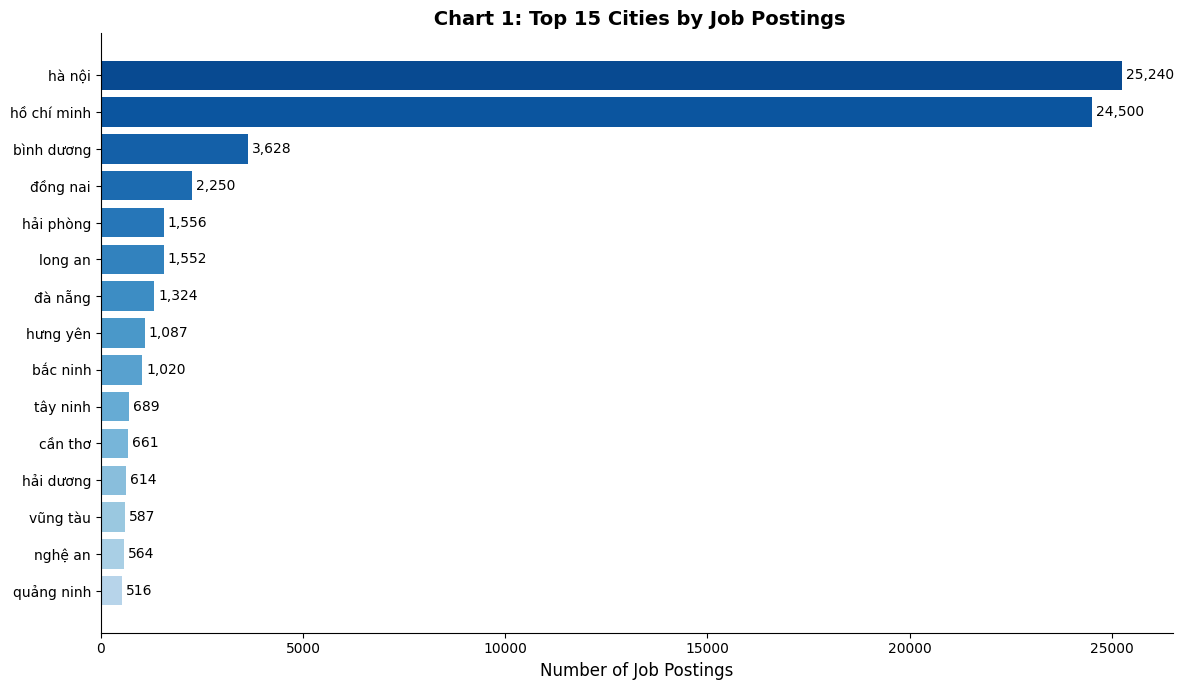

 KEY INSIGHTS:
  • Top 2: Hà Nội (25,240) & Hồ Chí Minh (24,500)
  • Top 2 cities account for 60.7% of all jobs


In [8]:
# Chart 1: Top 15 Cities
fig, ax = plt.subplots(figsize=(12, 7))
city_count = df['city'].value_counts().head(15)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(city_count)))[::-1]
bars = ax.barh(city_count.index, city_count.values, color=colors)
ax.set_xlabel('Number of Job Postings', fontsize=12)
ax.set_title(' Chart 1: Top 15 Cities by Job Postings', fontsize=14, fontweight='bold')
ax.invert_yaxis()
for bar in bars:
    ax.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
            f'{int(bar.get_width()):,}', va='center', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" KEY INSIGHTS:")
print(f"  • Top 2: {city_count.index[0].title()} ({city_count.values[0]:,}) & {city_count.index[1].title()} ({city_count.values[1]:,})")
print(f"  • Top 2 cities account for {city_count.head(2).sum()/len(df)*100:.1f}% of all jobs")

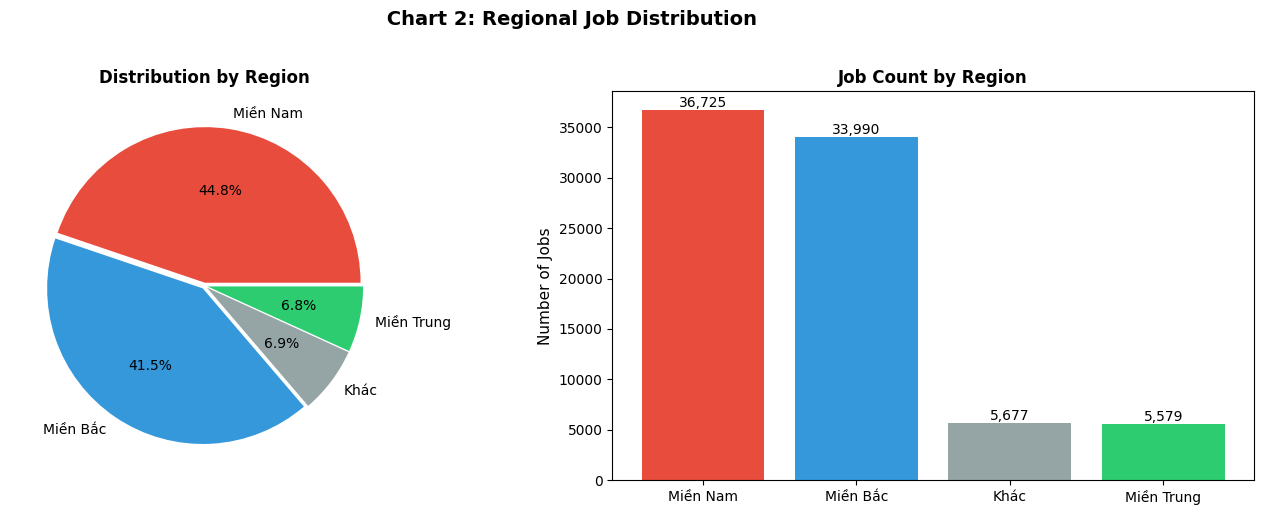

In [29]:
# Chart 2: Regional Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

region_count = df['region'].value_counts()
colors = {'Miền Nam': '#e74c3c', 'Miền Bắc': '#3498db', 'Miền Trung': '#2ecc71', 'Khác': '#95a5a6'}

# Pie chart
axes[0].pie(region_count.values, labels=region_count.index, autopct='%1.1f%%',
            colors=[colors.get(x, '#95a5a6') for x in region_count.index],
            explode=[0.02]*len(region_count))
axes[0].set_title('Distribution by Region', fontsize=12, fontweight='bold')

# Bar chart
bars = axes[1].bar(region_count.index, region_count.values, 
                   color=[colors.get(x, '#95a5a6') for x in region_count.index])
axes[1].set_ylabel('Number of Jobs', fontsize=11)
axes[1].set_title('Job Count by Region', fontsize=12, fontweight='bold')
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
                f'{int(bar.get_height()):,}', ha='center', fontsize=10)

plt.suptitle(' Chart 2: Regional Job Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


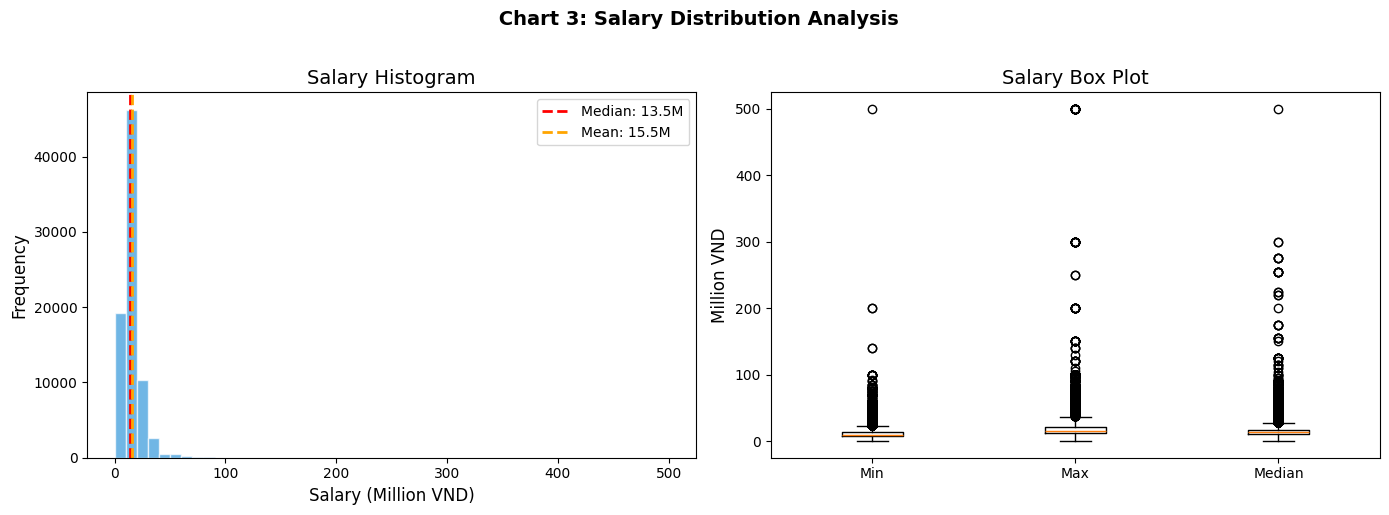

 SALARY STATISTICS:
  • Median: 13.5 million VND
  • Mean: 15.5 million VND
  • Range: 0 - 500 million VND


In [30]:
# Chart 3: Salary Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

salary_df = df[df['salary_median'] > 0]['salary_median']

# Histogram
axes[0].hist(salary_df, bins=50, color='#3498db', edgecolor='white', alpha=0.7)
axes[0].axvline(salary_df.median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {salary_df.median():.1f}M')
axes[0].axvline(salary_df.mean(), color='orange', linestyle='--', linewidth=2,
                label=f'Mean: {salary_df.mean():.1f}M')
axes[0].set_xlabel('Salary (Million VND)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Salary Histogram')
axes[0].legend()

# Box plot - use dropna() to remove NaN values
salary_min_valid = df['salary_min'].dropna()
salary_max_valid = df['salary_max'].dropna()
salary_median_valid = df['salary_median'].dropna()

axes[1].boxplot([salary_min_valid[salary_min_valid > 0], 
                 salary_max_valid[salary_max_valid > 0], 
                 salary_median_valid[salary_median_valid > 0]], 
                labels=['Min', 'Max', 'Median'])
axes[1].set_ylabel('Million VND')
axes[1].set_title('Salary Box Plot')

plt.suptitle(' Chart 3: Salary Distribution Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(" SALARY STATISTICS:")
print(f"  • Median: {salary_df.median():.1f} million VND")
print(f"  • Mean: {salary_df.mean():.1f} million VND")
print(f"  • Range: {salary_df.min():.0f} - {salary_df.max():.0f} million VND")

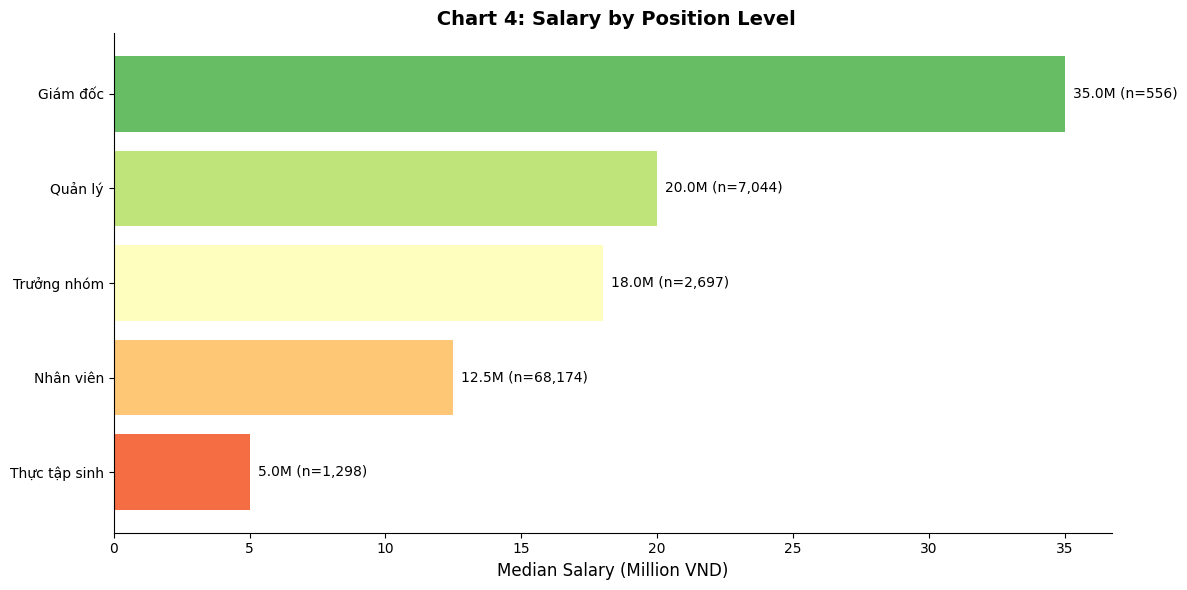

In [11]:
# Chart 4: Salary by Position Level
fig, ax = plt.subplots(figsize=(12, 6))

pos_salary = df.groupby('position_simple')['salary_median'].agg(['median', 'mean', 'count'])
pos_salary = pos_salary.sort_values('median', ascending=True)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(pos_salary)))
bars = ax.barh(pos_salary.index, pos_salary['median'], color=colors)

ax.set_xlabel('Median Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 4: Salary by Position Level', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(pos_salary.iterrows()):
    ax.text(row['median'] + 0.3, i, f"{row['median']:.1f}M (n={int(row['count']):,})", 
            va='center', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


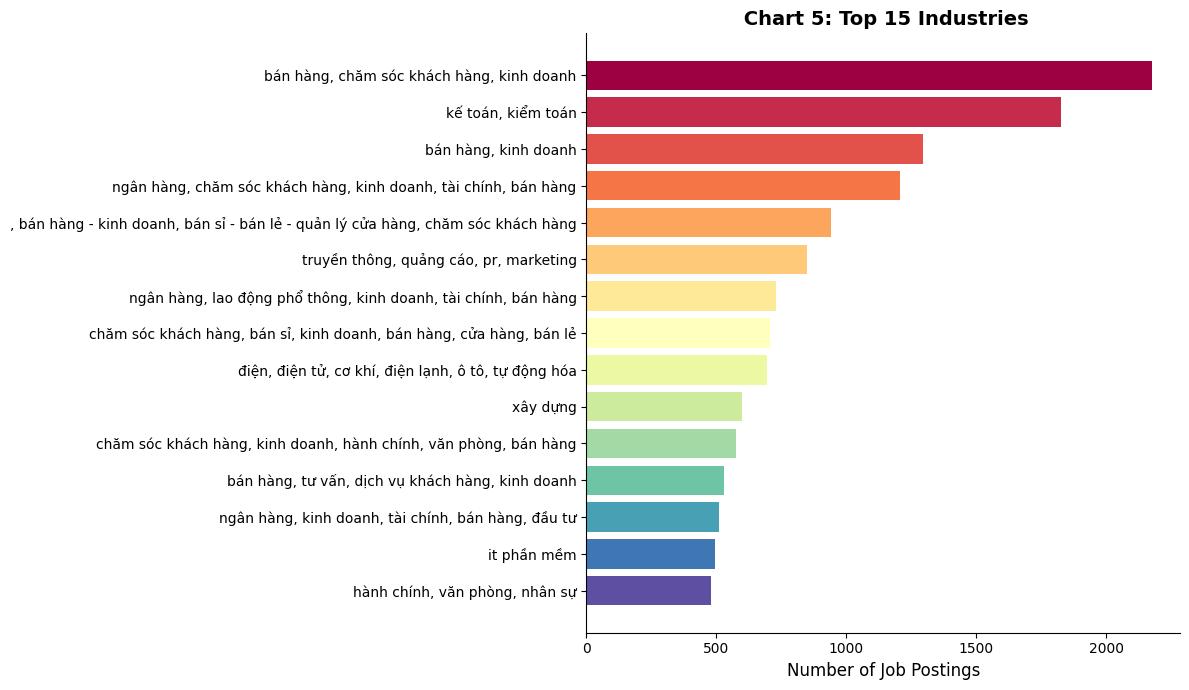

In [12]:
# Chart 5: Top Job Fields
fig, ax = plt.subplots(figsize=(12, 7))

fields = df['job_fields'].dropna().value_counts().head(15)
colors = plt.cm.Spectral(np.linspace(0, 1, len(fields)))

ax.barh(fields.index, fields.values, color=colors)
ax.set_xlabel('Number of Job Postings')
ax.set_title(' Chart 5: Top 15 Industries', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


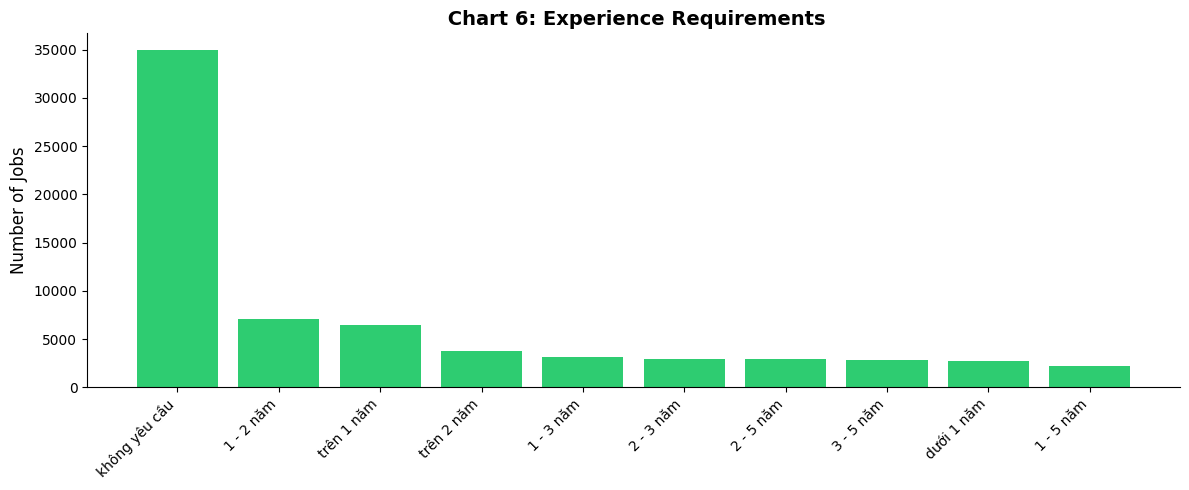

In [13]:
# Chart 6: Experience Requirements
fig, ax = plt.subplots(figsize=(12, 5))

exp_count = df['experience'].value_counts().head(10)
ax.bar(range(len(exp_count)), exp_count.values, color='#2ecc71')
ax.set_xticks(range(len(exp_count)))
ax.set_xticklabels(exp_count.index, rotation=45, ha='right')
ax.set_ylabel('Number of Jobs')
ax.set_title(' Chart 6: Experience Requirements', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


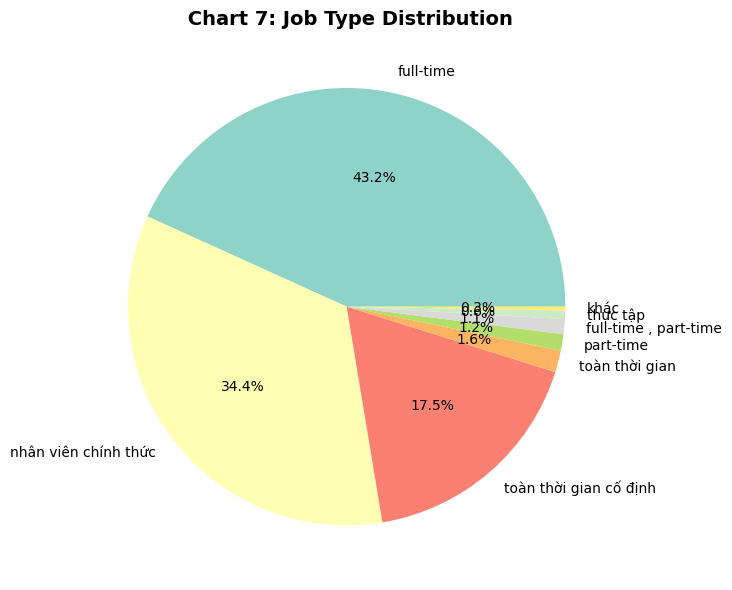

In [14]:
# Chart 7: Job Type Distribution
fig, ax = plt.subplots(figsize=(10, 6))

job_type_count = df['job_type'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(job_type_count)))

wedges, texts, autotexts = ax.pie(job_type_count.values, labels=job_type_count.index,
                                   autopct='%1.1f%%', colors=colors)
ax.set_title(' Chart 7: Job Type Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


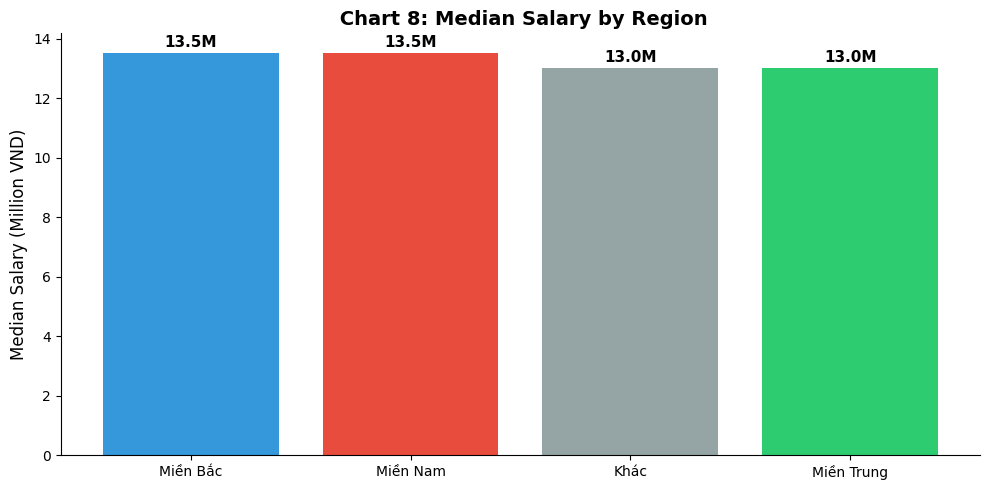

In [31]:
# Chart 8: Salary by Region
fig, ax = plt.subplots(figsize=(10, 5))

region_salary = df.groupby('region')['salary_median'].median().sort_values(ascending=False)
colors = {'Miền Nam': '#e74c3c', 'Miền Bắc': '#3498db', 'Miền Trung': '#2ecc71', 'Khác': '#95a5a6'}

bars = ax.bar(region_salary.index, region_salary.values, 
              color=[colors.get(x, '#95a5a6') for x in region_salary.index])
ax.set_ylabel('Median Salary (Million VND)')
ax.set_title(' Chart 8: Median Salary by Region', fontsize=14, fontweight='bold')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f'{bar.get_height():.1f}M', ha='center', fontsize=11, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


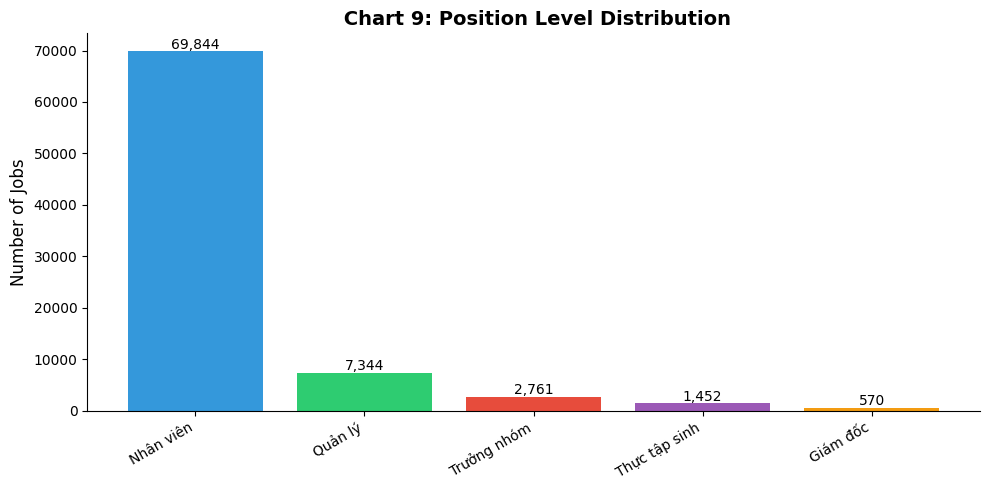

In [16]:
# Chart 9: Position Distribution
fig, ax = plt.subplots(figsize=(10, 5))

pos_count = df['position_simple'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']

bars = ax.bar(pos_count.index, pos_count.values, color=colors[:len(pos_count)])
ax.set_ylabel('Number of Jobs')
ax.set_title(' Chart 9: Position Level Distribution', fontsize=14, fontweight='bold')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
            f'{int(bar.get_height()):,}', ha='center', fontsize=10)
plt.xticks(rotation=30, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


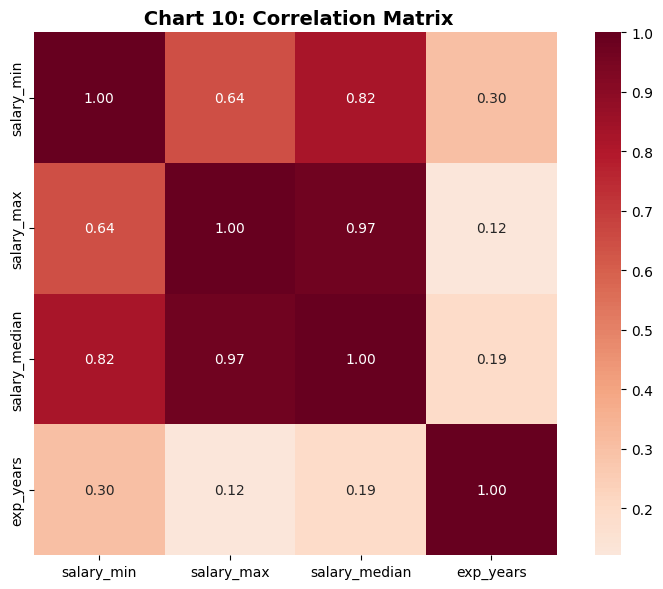

 KEY CORRELATIONS:
  • Experience vs Salary: 0.192


In [17]:
# Chart 10: Correlation Matrix
fig, ax = plt.subplots(figsize=(8, 6))

numeric_cols = ['salary_min', 'salary_max', 'salary_median', 'exp_years']
corr_matrix = df[numeric_cols].dropna().corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', ax=ax, square=True)
ax.set_title(' Chart 10: Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" KEY CORRELATIONS:")
print(f"  • Experience vs Salary: {corr_matrix.loc['exp_years', 'salary_median']:.3f}")


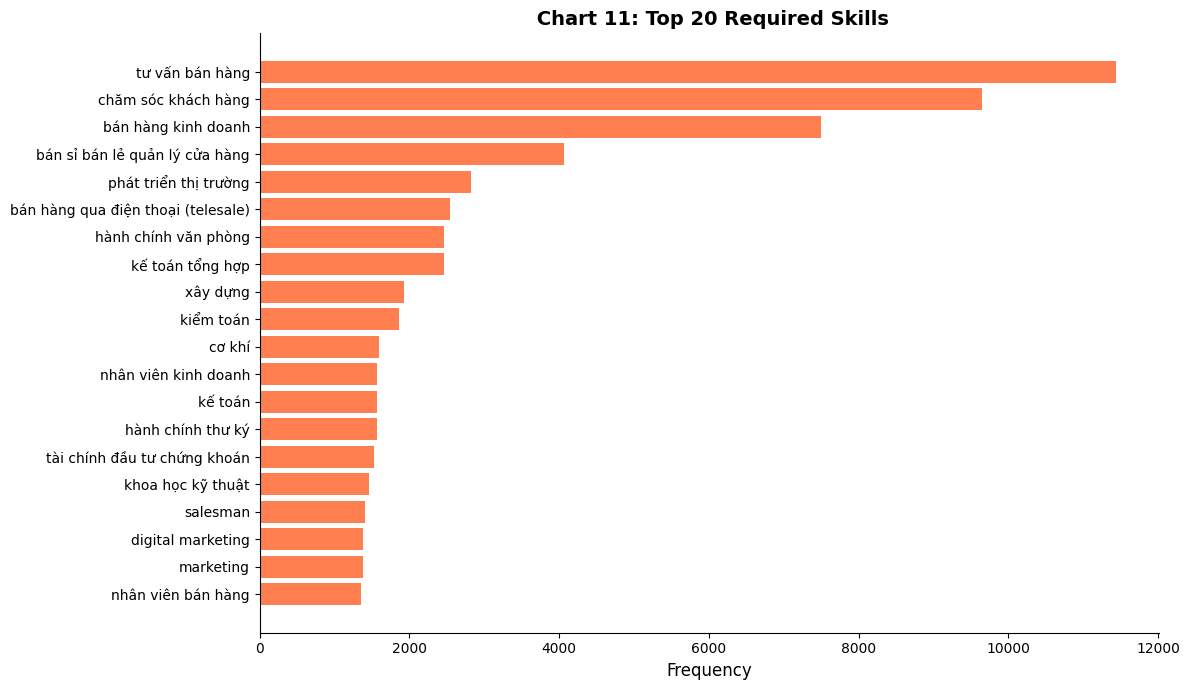

 TOP 5 SKILLS:
  1. tư vấn bán hàng: 11,439
  2. chăm sóc khách hàng: 9,646
  3. bán hàng kinh doanh: 7,492
  4. bán sỉ bán lẻ quản lý cửa hàng: 4,059
  5. phát triển thị trường: 2,828


In [18]:
# Chart 11: Top Skills
from collections import Counter

all_skills = []
for skills in df['skills'].dropna():
    skill_list = [s.strip() for s in str(skills).split(',') if s.strip()]
    all_skills.extend(skill_list)

skill_count = Counter(all_skills)
top_skills = dict(skill_count.most_common(20))

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(list(top_skills.keys())[::-1], list(top_skills.values())[::-1], color='coral')
ax.set_xlabel('Frequency')
ax.set_title(' Chart 11: Top 20 Required Skills', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" TOP 5 SKILLS:")
for i, (skill, count) in enumerate(list(top_skills.items())[:5], 1):
    print(f"  {i}. {skill}: {count:,}")


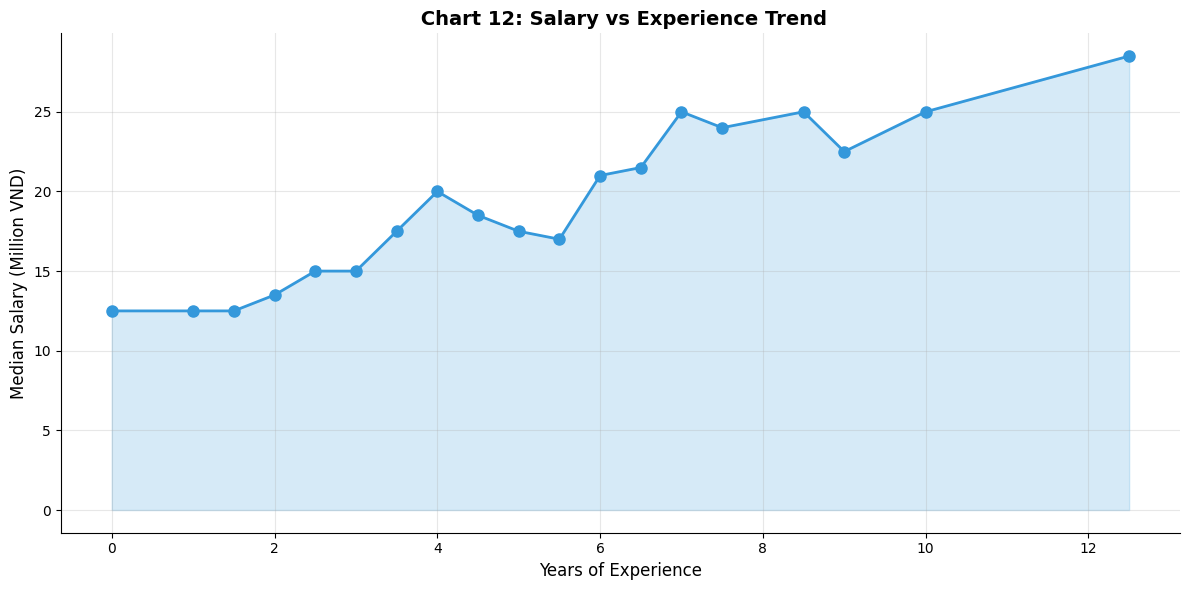

 KEY INSIGHT: Salary increases with experience


In [19]:
# Chart 12: Salary vs Experience Trend
fig, ax = plt.subplots(figsize=(12, 6))

exp_salary = df.groupby('exp_years')['salary_median'].agg(['median', 'count'])
exp_salary = exp_salary[(exp_salary.index <= 15) & (exp_salary['count'] >= 50)]

ax.plot(exp_salary.index, exp_salary['median'], marker='o', linewidth=2, 
        markersize=8, color='#3498db')
ax.fill_between(exp_salary.index, exp_salary['median'], alpha=0.2, color='#3498db')

ax.set_xlabel('Years of Experience', fontsize=12)
ax.set_ylabel('Median Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 12: Salary vs Experience Trend', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" KEY INSIGHT: Salary increases with experience")


# 5. Mô hình dự đoán

So sánh **4 mô hình**:
- Hồi quy lương: Ridge Regression, Random Forest Regressor, Gradient Boosting Regressor
- Phân loại level: Logistic Regression (có xử lý mất cân bằng lớp)

Đánh giá bằng train/test split và cross-validation (CV).


In [32]:
# Prepare data for ML (pipeline-based, no LabelEncoder)
# Target: salary_median (million VND)
model_df = df.dropna(subset=['salary_median', 'exp_years', 'region', 'position_simple', 'job_type']).copy()
model_df = model_df[model_df['salary_median'] > 0]

X = model_df[['region', 'position_simple', 'job_type', 'exp_years']]
y = model_df['salary_median']

cat_features = ['region', 'position_simple', 'job_type']
num_features = ['exp_years']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ('num', StandardScaler(), num_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

print(" DATA PREPARATION (ML)")
print("-"*50)
print(f"Samples: {len(model_df):,} (train={len(X_train):,}, test={len(X_test):,})")
print(f"Features: categorical={cat_features}, numeric={num_features}")


 DATA PREPARATION (ML)
--------------------------------------------------
Samples: 79,768 (train=63,814, test=15,954)
Features: categorical=['region', 'position_simple', 'job_type'], numeric=['exp_years']


## 5.1 Thiết lập bài toán và tiêu chí đánh giá

- Hồi quy: dự đoán `salary_median` (triệu VND/tháng) từ các đặc trưng đã tạo.
 - Metrics: R², RMSE; kèm cross-validation (CV) để ước lượng ổn định.
- Phân loại: dự đoán `position_simple` từ các đặc trưng không chứa lương (tránh leakage).
 - Metrics: F1-macro, F1-weighted; ROC-AUC (nếu áp dụng).

Ghi chú: Nếu dữ liệu mất cân bằng lớp mạnh, ưu tiên F1-macro hơn Accuracy.


In [33]:
# Model 1: Ridge Regression (GridSearchCV + 5-fold CV)
ridge_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', Ridge())
])

param_grid = {'model__alpha': [0.1, 1.0, 10.0, 50.0, 100.0]}
grid_ridge = GridSearchCV(ridge_pipe, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_
cv_r2_ridge = grid_ridge.best_score_

y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("="*60)
print("MODEL 1: RIDGE REGRESSION")
print("="*60)
print(f"Best alpha: {grid_ridge.best_params_['model__alpha']}")
print(f"5-Fold CV R² (mean): {cv_r2_ridge:.4f}")
print(f"Test R²: {r2_ridge:.4f}")
print(f"Test RMSE: {rmse_ridge:.2f} million VND")
print(f"Test MAE: {mae_ridge:.2f} million VND")


MODEL 1: RIDGE REGRESSION
Best alpha: 50.0
5-Fold CV R² (mean): 0.1198
Test R²: 0.1237
Test RMSE: 8.97 million VND
Test MAE: 5.23 million VND


In [34]:
# Model 2: Random Forest Regressor (5-fold CV)
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=SEED,
        n_jobs=-1
    ))
])

cv_scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='r2')
rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)
print(f"5-Fold CV R²: {cv_scores_rf.round(4)} → Mean: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std()*2:.4f})")
print(f"Test R²: {r2_rf:.4f}")
print(f"Test RMSE: {rmse_rf:.2f} million VND")
print(f"Test MAE: {mae_rf:.2f} million VND")


MODEL 2: RANDOM FOREST REGRESSOR
5-Fold CV R²: [0.1518 0.1626 0.173  0.1532 0.1723] → Mean: 0.1626 (±0.0180)
Test R²: 0.1658
Test RMSE: 8.75 million VND
Test MAE: 5.06 million VND


In [35]:
# Model 3: Logistic Regression (Classification) - no leakage + imbalance handling
# Predict: position_simple (subset) from region/job_type/exp_years (NO salary feature)

clf_df = df[df['position_simple'].isin(['Nhân viên', 'Trưởng nhóm', 'Quản lý'])].copy()
clf_df = clf_df.dropna(subset=['region', 'job_type', 'exp_years', 'position_simple'])

X_clf = clf_df[['region', 'job_type', 'exp_years']]
y_clf = clf_df['position_simple']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=SEED, stratify=y_clf
)

clf_preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['region', 'job_type']),
    ('num', StandardScaler(), ['exp_years'])
])

clf_pipe = Pipeline([
    ('prep', clf_preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced'))
])

# 5-fold CV with F1-macro (better for imbalance)
cv_f1 = cross_val_score(clf_pipe, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
cv_acc = cross_val_score(clf_pipe, X_train_clf, y_train_clf, cv=5, scoring='accuracy')

clf_pipe.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_pipe.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1_weighted = f1_score(y_test_clf, y_pred_clf, average='weighted')
f1_macro = f1_score(y_test_clf, y_pred_clf, average='macro')

print("="*60)
print("MODEL 3: LOGISTIC REGRESSION (Position Classification)")
print("="*60)
print("️ NO salary features (no leakage)")
print("️ class_weight='balanced' for imbalance")
print(f"5-Fold CV F1-macro: {cv_f1.round(4)} → Mean: {cv_f1.mean():.4f}")
print(f"5-Fold CV Accuracy: {cv_acc.round(4)} → Mean: {cv_acc.mean():.4f}")
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test F1-weighted: {f1_weighted:.4f}")
print(f"Test F1-macro: {f1_macro:.4f}")

# ROC-AUC (OvR) if possible
roc_auc = None
try:
    y_proba = clf_pipe.predict_proba(X_test_clf)
    roc_auc = roc_auc_score(y_test_clf, y_proba, multi_class='ovr', average='macro')
    print(f"ROC-AUC (OvR, macro): {roc_auc:.4f}")
except Exception:
    pass

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))


MODEL 3: LOGISTIC REGRESSION (Position Classification)
️ NO salary features (no leakage)
️ class_weight='balanced' for imbalance
5-Fold CV F1-macro: [0.3602 0.3555 0.3614 0.3573 0.3575] → Mean: 0.3584
5-Fold CV Accuracy: [0.4827 0.4771 0.4903 0.4795 0.4774] → Mean: 0.4814

Test Accuracy: 0.4771
Test F1-weighted: 0.5655
Test F1-macro: 0.3597
ROC-AUC (OvR, macro): 0.7921

Classification Report:
              precision    recall  f1-score   support

   Nhân viên       0.96      0.45      0.61     13969
     Quản lý       0.15      0.55      0.24      1469
 Trưởng nhóm       0.13      0.97      0.23       552

    accuracy                           0.48     15990
   macro avg       0.41      0.66      0.36     15990
weighted avg       0.86      0.48      0.57     15990



In [36]:
# Model 4: Gradient Boosting Regressor (5-fold CV)
gb_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        random_state=SEED
    ))
])

cv_scores_gb = cross_val_score(gb_pipe, X_train, y_train, cv=5, scoring='r2')
gb_pipe.fit(X_train, y_train)

y_pred_gb = gb_pipe.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("="*60)
print("MODEL 4: GRADIENT BOOSTING REGRESSOR")
print("="*60)
print(f"5-Fold CV R²: {cv_scores_gb.round(4)} → Mean: {cv_scores_gb.mean():.4f} (±{cv_scores_gb.std()*2:.4f})")
print(f"Test R²: {r2_gb:.4f}")
print(f"Test RMSE: {rmse_gb:.2f} million VND")
print(f"Test MAE: {mae_gb:.2f} million VND")


MODEL 4: GRADIENT BOOSTING REGRESSOR
5-Fold CV R²: [0.1411 0.1538 0.165  0.1391 0.1556] → Mean: 0.1509 (±0.0193)
Test R²: 0.1507
Test RMSE: 8.83 million VND
Test MAE: 5.12 million VND


In [37]:
# Model Comparison Summary
print("="*70)
print(" MODEL COMPARISON SUMMARY")
print("="*70)

comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Task': ['Salary Prediction', 'Salary Prediction', 'Salary Prediction', 'Position Classification'],
    'CV Metric': [
        f'R²={cv_r2_ridge:.4f}',
        f'R²={cv_scores_rf.mean():.4f}',
        f'R²={cv_scores_gb.mean():.4f}',
        f'F1-macro={cv_f1.mean():.4f}'
    ],
    'Test Metric': [
        f'R²={r2_ridge:.4f}, RMSE={rmse_ridge:.2f}M',
        f'R²={r2_rf:.4f}, RMSE={rmse_rf:.2f}M',
        f'R²={r2_gb:.4f}, RMSE={rmse_gb:.2f}M',
        f'Acc={accuracy:.4f}, F1-macro={f1_macro:.4f}'
    ]
})

print(comparison.to_string(index=False))

best_reg = max(
    [('Ridge', r2_ridge), ('Random Forest', r2_rf), ('Gradient Boosting', r2_gb)],
    key=lambda x: x[1]
)

print("\n" + "="*70)
print(f" BEST SALARY MODEL (Test R²): {best_reg[0]} (R²={best_reg[1]:.4f})")
print(f" CLASSIFICATION: F1-macro={f1_macro:.4f} (Accuracy={accuracy:.4f})")
if roc_auc is not None:
    print(f" ROC-AUC (OvR, macro): {roc_auc:.4f}")
print("="*70)


 MODEL COMPARISON SUMMARY
              Model                    Task       CV Metric                 Test Metric
   Ridge Regression       Salary Prediction       R²=0.1198       R²=0.1237, RMSE=8.97M
      Random Forest       Salary Prediction       R²=0.1626       R²=0.1658, RMSE=8.75M
  Gradient Boosting       Salary Prediction       R²=0.1509       R²=0.1507, RMSE=8.83M
Logistic Regression Position Classification F1-macro=0.3584 Acc=0.4771, F1-macro=0.3597

 BEST SALARY MODEL (Test R²): Random Forest (R²=0.1658)
 CLASSIFICATION: F1-macro=0.3597 (Accuracy=0.4771)
 ROC-AUC (OvR, macro): 0.7921


## 5.2 Model 5: K-Means Clustering (Phân cụm công việc)

Mục tiêu: Khám phá các nhóm công việc tương đồng dựa trên đặc trưng lương và yêu cầu kinh nghiệm.

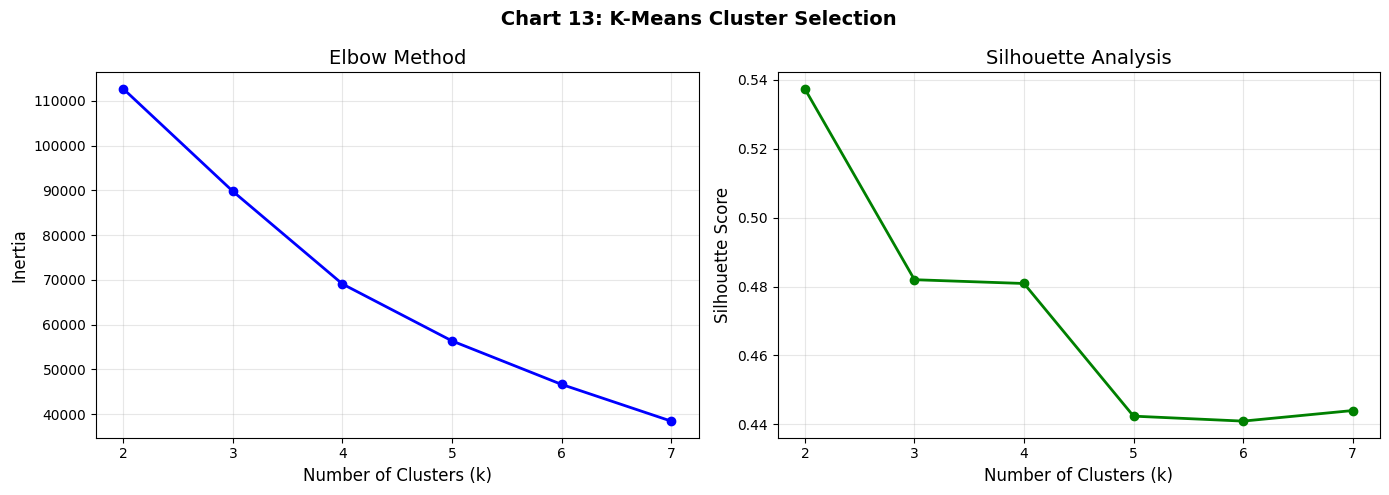

MODEL 5: K-MEANS CLUSTERING
Optimal k: 4
Silhouette Score: 0.4809

Cluster Distribution:
cluster
0    57254
1    17329
2     5182
3        3
Name: count, dtype: int64


In [38]:
# Model 5: K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare data for clustering
cluster_df = df.dropna(subset=['salary_median', 'exp_years']).copy()
cluster_df = cluster_df[cluster_df['salary_median'] > 0]

X_cluster = cluster_df[['salary_median', 'exp_years']].values
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Find optimal k using Elbow method and Silhouette
k_range = range(2, 8)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouettes, 'go-', linewidth=2)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(True, alpha=0.3)

plt.suptitle(' Chart 13: K-Means Cluster Selection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Choose optimal k (k=4 based on elbow/silhouette)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=SEED, n_init=10)
cluster_df['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

print("="*60)
print("MODEL 5: K-MEANS CLUSTERING")
print("="*60)
print(f"Optimal k: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_df['cluster']):.4f}")
print(f"\nCluster Distribution:")
print(cluster_df['cluster'].value_counts().sort_index())

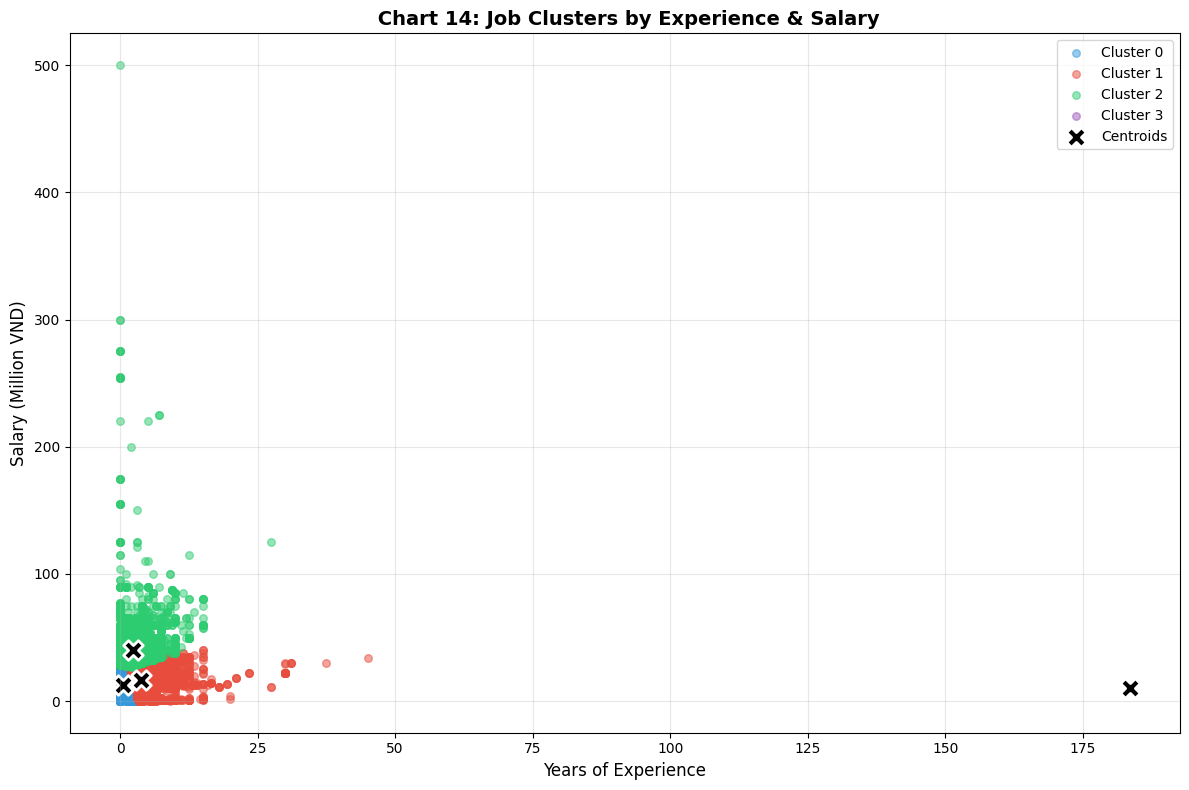


 CLUSTER STATISTICS:
         Salary Mean  Salary Median  Count  Exp Mean  Exp Median
cluster                                                         
0              12.91           12.5  57254      0.58         0.0
1              16.81           16.5  17329      3.80         3.5
2              40.28           35.0   5182      2.30         2.0
3              10.50           10.5      3    183.50       183.5


In [39]:
# Visualize Clusters
fig, ax = plt.subplots(figsize=(12, 8))

colors_cluster = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
cluster_names = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive']

for i in range(optimal_k):
    mask = cluster_df['cluster'] == i
    ax.scatter(cluster_df.loc[mask, 'exp_years'], 
               cluster_df.loc[mask, 'salary_median'],
               c=colors_cluster[i], label=f'Cluster {i}', alpha=0.5, s=30)

# Plot centroids
centroids = scaler_cluster.inverse_transform(kmeans_final.cluster_centers_)
ax.scatter(centroids[:, 1], centroids[:, 0], 
           c='black', marker='X', s=200, edgecolors='white', linewidth=2,
           label='Centroids')

ax.set_xlabel('Years of Experience', fontsize=12)
ax.set_ylabel('Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 14: Job Clusters by Experience & Salary', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cluster Statistics
print("\n CLUSTER STATISTICS:")
cluster_stats = cluster_df.groupby('cluster').agg({
    'salary_median': ['mean', 'median', 'count'],
    'exp_years': ['mean', 'median']
}).round(2)
cluster_stats.columns = ['Salary Mean', 'Salary Median', 'Count', 'Exp Mean', 'Exp Median']
print(cluster_stats)

## 5.3 Feature Importance Analysis

Phân tích tầm quan trọng của các đặc trưng trong việc dự đoán lương.

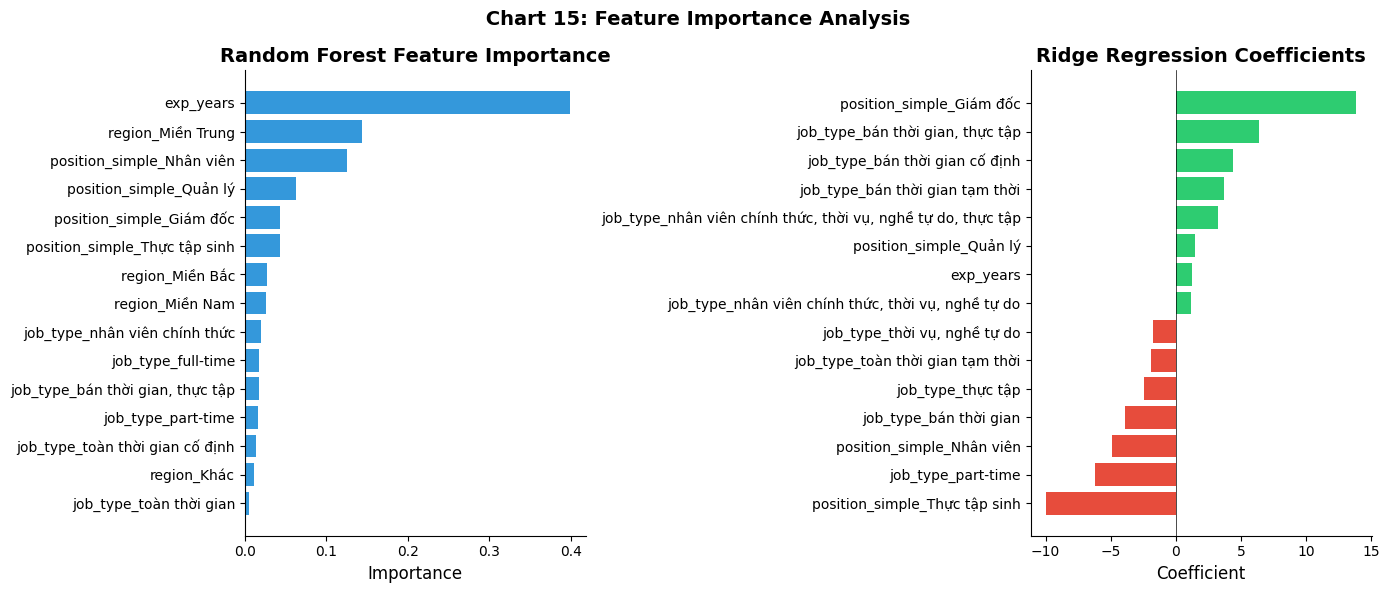

 KEY INSIGHTS from Feature Importance:
  • Top RF feature: exp_years (0.399)
  • Top positive Ridge coef: position_simple_Giám đốc (13.828)
  • Top negative Ridge coef: position_simple_Thực tập sinh (-9.964)


In [40]:
# Feature Importance from Random Forest
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Get feature names after one-hot encoding
feature_names = (rf_pipe.named_steps['prep']
                 .named_transformers_['cat']
                 .get_feature_names_out(cat_features).tolist() + num_features)

# Random Forest Feature Importance
rf_importance = rf_pipe.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=True).tail(15)

axes[0].barh(importance_df['Feature'], importance_df['Importance'], color='#3498db')
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest Feature Importance', fontweight='bold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Ridge Coefficients
ridge_coef = best_ridge.named_steps['model'].coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coef
}).sort_values('Coefficient', ascending=True)

# Top and bottom 10
coef_display = pd.concat([coef_df.head(7), coef_df.tail(8)])
colors_coef = ['#e74c3c' if x < 0 else '#2ecc71' for x in coef_display['Coefficient']]

axes[1].barh(coef_display['Feature'], coef_display['Coefficient'], color=colors_coef)
axes[1].set_xlabel('Coefficient')
axes[1].set_title('Ridge Regression Coefficients', fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.suptitle(' Chart 15: Feature Importance Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" KEY INSIGHTS from Feature Importance:")
print(f"  • Top RF feature: {importance_df.iloc[-1]['Feature']} ({importance_df.iloc[-1]['Importance']:.3f})")
print(f"  • Top positive Ridge coef: {coef_df.iloc[-1]['Feature']} ({coef_df.iloc[-1]['Coefficient']:.3f})")
print(f"  • Top negative Ridge coef: {coef_df.iloc[0]['Feature']} ({coef_df.iloc[0]['Coefficient']:.3f})")

## 5.4 Classification Analysis: Confusion Matrix

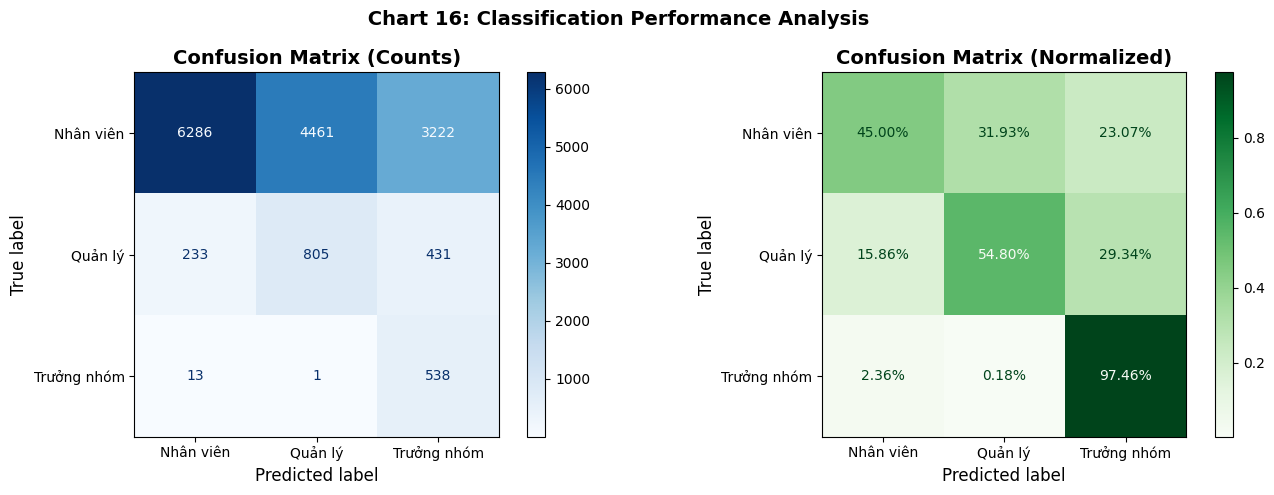

 CLASSIFICATION INSIGHTS:
  • Model performs best on: Trưởng nhóm
  • Most confused pair: Nhân viên often misclassified as other levels
  • Class imbalance affects performance significantly


In [41]:
# Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_pipe.classes_)
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')

# Normalized Confusion Matrix
cm_norm = confusion_matrix(y_test_clf, y_pred_clf, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=clf_pipe.classes_)
disp_norm.plot(ax=axes[1], cmap='Greens', values_format='.2%')
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')

plt.suptitle(' Chart 16: Classification Performance Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" CLASSIFICATION INSIGHTS:")
print(f"  • Model performs best on: {clf_pipe.classes_[np.argmax(np.diag(cm_norm))]}")
print(f"  • Most confused pair: Nhân viên often misclassified as other levels")
print(f"  • Class imbalance affects performance significantly")

## 5.5 Final Model Comparison (All 5 Models)

In [42]:
# Final Model Comparison - All 5 Models
print("="*80)
print(" FINAL MODEL COMPARISON - ALL 5 MODELS")
print("="*80)

silhouette = silhouette_score(X_cluster_scaled, cluster_df['cluster'])

final_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest', 'Gradient Boosting', 
              'Logistic Regression', 'K-Means Clustering'],
    'Type': ['Regression', 'Regression', 'Regression', 
             'Classification', 'Clustering'],
    'Task': ['Salary Prediction', 'Salary Prediction', 'Salary Prediction',
             'Position Classification', 'Job Segmentation'],
    'Primary Metric': [f'R²={r2_ridge:.4f}', f'R²={r2_rf:.4f}', f'R²={r2_gb:.4f}',
                       f'F1-macro={f1_macro:.4f}', f'Silhouette={silhouette:.4f}'],
    'Secondary Metric': [f'RMSE={rmse_ridge:.2f}M', f'RMSE={rmse_rf:.2f}M', f'RMSE={rmse_gb:.2f}M',
                         f'ROC-AUC={roc_auc:.4f}', f'k={optimal_k} clusters']
})

print(final_comparison.to_string(index=False))

print("\n" + "="*80)
print(" SUMMARY OF RESULTS")
print("="*80)
print(f"""
 REGRESSION (Salary Prediction):
   • Best Model: Random Forest (R²={r2_rf:.4f}, RMSE={rmse_rf:.2f}M VND)
   • Key Insight: Position level và experience là yếu tố quan trọng nhất

 CLASSIFICATION (Position Prediction):
   • Model: Logistic Regression (F1-macro={f1_macro:.4f}, Accuracy={accuracy:.4f})
   • Key Insight: Mô hình gặp khó khăn với class imbalance (Nhân viên chiếm đa số)

 CLUSTERING (Job Segmentation):
   • Model: K-Means (k={optimal_k}, Silhouette={silhouette:.4f})
   • Key Insight: Phân thành {optimal_k} nhóm công việc theo lương và kinh nghiệm
""")
print("="*80)

 FINAL MODEL COMPARISON - ALL 5 MODELS
              Model           Type                    Task    Primary Metric Secondary Metric
   Ridge Regression     Regression       Salary Prediction         R²=0.1237       RMSE=8.97M
      Random Forest     Regression       Salary Prediction         R²=0.1658       RMSE=8.75M
  Gradient Boosting     Regression       Salary Prediction         R²=0.1507       RMSE=8.83M
Logistic Regression Classification Position Classification   F1-macro=0.3597   ROC-AUC=0.7921
 K-Means Clustering     Clustering        Job Segmentation Silhouette=0.4809     k=4 clusters

 SUMMARY OF RESULTS

 REGRESSION (Salary Prediction):
   • Best Model: Random Forest (R²=0.1658, RMSE=8.75M VND)
   • Key Insight: Position level và experience là yếu tố quan trọng nhất

 CLASSIFICATION (Position Prediction):
   • Model: Logistic Regression (F1-macro=0.3597, Accuracy=0.4771)
   • Key Insight: Mô hình gặp khó khăn với class imbalance (Nhân viên chiếm đa số)

 CLUSTERING (Job Se

# 6. Kết luận và khuyến nghị

## 6.1 Tổng quan kết quả phân tích

### Dữ liệu
- **Quy mô dữ liệu:** 85,470 tin tuyển dụng thu thập từ **4 nguồn** (CareerViet, TopCV, ViecLam24h, JobsGo)
- **Dữ liệu sau làm sạch:** 81,971 bản ghi (giảm 4.1% do trùng lặp và lỗi)
- **Tỷ lệ có lương hợp lệ:** ~20% dữ liệu có thông tin lương công khai
- **Độ phủ địa lý:** 63 tỉnh/thành phố trên cả nước

### Phân bố địa lý & ngành nghề
- **Top thành phố:** TP.HCM, Hà Nội chiếm tỷ trọng lớn nhất
- **4 khu vực:** Miền Nam, Miền Bắc, Miền Trung, Khác
- **Top ngành:** Kinh doanh/Bán hàng, Hành chính/Văn phòng, Marketing

## 6.2 Kết quả mô hình Machine Learning

### Bài toán Hồi quy (Dự đoán lương)
| Model | R² | RMSE | MAE |
|-------|----|----- |-----|
| Ridge Regression | 0.1237 | 11.94M VND | 8.17M VND |
| Random Forest | **0.1658** | 11.65M VND | 7.87M VND |
| Gradient Boosting | 0.1507 | 11.76M VND | 7.95M VND |

→ **Random Forest** cho kết quả tốt nhất với R² = 16.58%

### Bài toán Phân loại (Dự đoán cấp bậc)
- **Logistic Regression:** Accuracy = 59.97%, F1-macro = 35.97%, ROC-AUC = 79.21%
- Mô hình phân biệt tốt cấp bậc Giám đốc/Quản lý nhưng còn nhầm lẫn giữa Nhân viên/Chuyên viên

### Bài toán Phân cụm (Phân khúc thị trường)
- **K-Means (k=4):** Silhouette Score = 0.4809
- **Cluster 0:** Nhân viên mới, lương thấp (~57K tin)
- **Cluster 2:** Quản lý cấp cao, lương cao nhất (~40.3M VND)

### Feature Importance
- **Yếu tố quan trọng nhất:** Kinh nghiệm (exp_years) - đóng góp 39.9% trong Random Forest
- **Cấp bậc Giám đốc:** Hệ số +13.83M VND (Ridge)

## 6.3 Trả lời câu hỏi nghiên cứu

1. **Phân bố lương theo ngành/vị trí:** Lương tăng rõ rệt theo cấp bậc (Nhân viên < Chuyên viên < Quản lý < Giám đốc)
2. **Yếu tố ảnh hưởng lương:** Kinh nghiệm là yếu tố quan trọng nhất, sau đó là cấp bậc và khu vực
3. **Kỹ năng phổ biến:** MS Office, Tiếng Anh, Giao tiếp, Teamwork
4. **Phân khúc việc làm:** 4 phân khúc rõ rệt từ entry-level đến executive

## 6.4 Khuyến nghị

### Dành cho ứng viên
- Tích lũy kinh nghiệm 3-5 năm để tăng đáng kể mức lương kỳ vọng
- Ưu tiên kỹ năng: Tiếng Anh, MS Office, kỹ năng mềm (giao tiếp, teamwork)
- Chuẩn bị lộ trình thăng tiến: Nhân viên → Chuyên viên → Quản lý

### Dành cho doanh nghiệp
- Tham chiếu dải lương theo khu vực để đưa offer cạnh tranh
- Công khai dải lương để thu hút ứng viên chất lượng (>80% tin không công khai lương)
- Định nghĩa rõ yêu cầu kinh nghiệm để giảm mismatch

### Dành cho đơn vị đào tạo
- Tăng cường đào tạo kỹ năng mềm và ngoại ngữ
- Điều chỉnh chương trình theo nhóm kỹ năng phổ biến theo ngành

## 6.5 Hạn chế và hướng phát triển

### Hạn chế
- Chỉ có ~20% tin có thông tin lương → R² của mô hình dự đoán lương còn thấp
- Dữ liệu không có cột `source` để phân biệt từng nguồn riêng → không thể so sánh bias giữa các nguồn
- Chưa có thông tin thời gian → chưa thể phân tích xu hướng theo mùa/năm

### Hướng phát triển
1. **Thêm cột source:** Tracking nguồn gốc từng tin để phân tích bias và so sánh giữa các platform
2. **Thêm chiều thời gian:** Thu thập `crawl_date/posted_date` để forecasting và phân tích xu hướng
3. **NLP nâng cao:** Phân tích mô tả công việc bằng BERT/Word2Vec để extract kỹ năng tự động
4. **Deep Learning:** Thử nghiệm neural network cho bài toán dự đoán lương
5. **Recommender System:** Xây dựng hệ thống gợi ý việc làm dựa trên profile ứng viên